## Kelompok 1
Muhammad Fadlul Hafiizh (2209889)

Muhammad Iqbal

Fraanklin Impianro Turnip (2203211)




## Penjelasan Dataset

Dataset yang kelompok kita gunakan merupakan kumpulan foto foto kendaraan roda dua.
Model yang kita buat nantinya bertujuan untuk dapat membedakan/klasifikasi kendaraan
matic atau kendaraan manual.

In [1]:
import tensorflow as tf
import matplotlib.pyplot as plt
import os
import pandas as pd

from shutil import copyfile
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential
from tensorflow.keras.preprocessing import image
from sklearn.model_selection import train_test_split
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.preprocessing.image import load_img


In [2]:
# mount gdrive untuk dapat mengambil dataset
# from google.colab import drive
# drive.mount('/content/gdrive')

ModuleNotFoundError: No module named 'google.colab'

# Muat dan Split Dataset


In [4]:
# Kumpulan direktori dan target direktori untuk memisah data test dan train
data_dir = 'DatasetMotor'
train_dir = 'TrainData'
test_dir = 'TestData'

# Dapatkan daftar semua file gambar di dalam direktori
all_image_files = [os.path.join(data_dir, class_folder, f) for class_folder in os.listdir(data_dir) if os.path.isdir(os.path.join(data_dir, class_folder)) for f in os.listdir(os.path.join(data_dir, class_folder))]

# Dapatkan daftar semua label
all_labels = [class_folder for class_folder in os.listdir(data_dir) if os.path.isdir(os.path.join(data_dir, class_folder)) for _ in os.listdir(os.path.join(data_dir, class_folder))]

# Bagi data menjadi train dan test secara acak
train_files, test_files, train_labels, test_labels = train_test_split(
    all_image_files, all_labels, test_size=0.2, random_state=12
)

In [ ]:

# Pindahkan file ke direktori train
# for file, label in zip(train_files, train_labels):
#     dest = os.path.join(train_dir, label, os.path.basename(file))
#     os.makedirs(os.path.dirname(dest), exist_ok=True)
#     copyfile(file, dest)

In [ ]:
# Pindahkan file ke direktori test
# for file, label in zip(test_files, test_labels):
#     dest = os.path.join(test_dir, label, os.path.basename(file))
#     os.makedirs(os.path.dirname(dest), exist_ok=True)
#     copyfile(file, dest)

In [5]:
ds_train = tf.keras.preprocessing.image_dataset_from_directory(train_dir)
ds_test = tf.keras.preprocessing.image_dataset_from_directory(test_dir)

Found 435 files belonging to 2 classes.
Found 114 files belonging to 2 classes.


In [6]:
class_names = ds_train.class_names
train_class_counts = {class_name: len(os.listdir(os.path.join(train_dir, class_name))) for class_name in class_names}
test_class_counts = {class_name: len(os.listdir(os.path.join(test_dir, class_name))) for class_name in class_names}

print("\nJumlah Gambar Data Train:")
for class_name, count in train_class_counts.items():
    print(f"{class_name}: {count} ")

print("\nJumlah Gambar Data Test:")
for class_name, count in test_class_counts.items():
    print(f"{class_name}: {count} ")


Jumlah Gambar Data Train:
Manual: 242 
Matic: 221 

Jumlah Gambar Data Test:
Manual: 58 
Matic: 58 


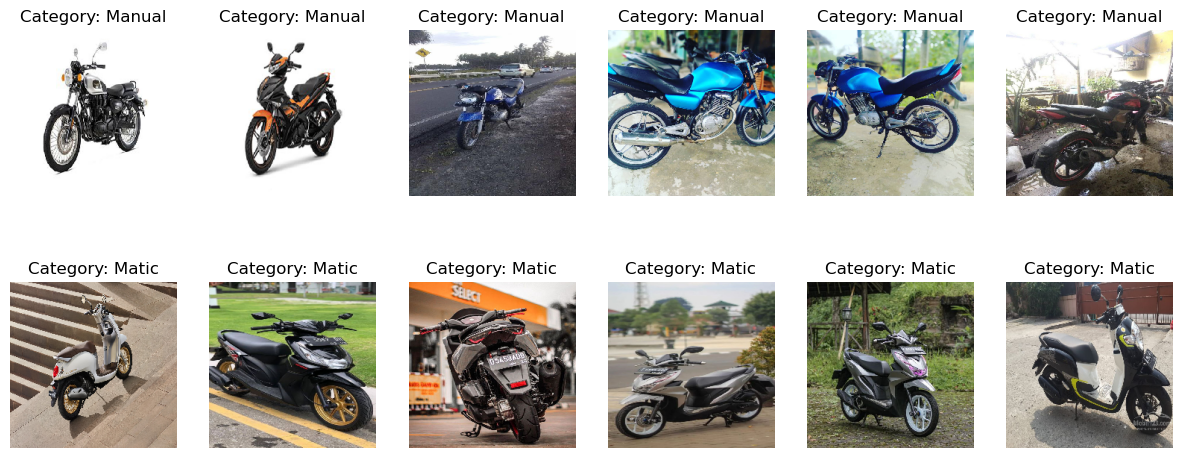

In [7]:
# Dapatkan daftar semua label (nama kategori)
categories = os.listdir(train_dir)

# Tampilkan 6 sampel gambar dari masing-masing kategori
plt.figure(figsize=(15, len(categories) * 3))

for i, category in enumerate(categories):
    category_dir = os.path.join(train_dir, category)
    image_files = [os.path.join(category_dir, f) for f in os.listdir(category_dir) ][:6]

    for j, image_path in enumerate(image_files):
        plt.subplot(len(categories), 6, i * 6 + j + 1)
        img = load_img(image_path, target_size=(224, 224))
        plt.imshow(img)
        plt.title(f"Category: {category}")
        plt.axis("off")

plt.show()

## Pembuatan Model

In [64]:
batch_size = 60
image_size = (140, 140)
train_generator = ImageDataGenerator(rescale=1./255).flow_from_directory(
    train_dir,
    target_size=image_size,
    batch_size=batch_size,
    class_mode='binary'
)
test_generator = ImageDataGenerator(rescale=1./255).flow_from_directory(
    test_dir,
    target_size=image_size,
    batch_size=batch_size,
    class_mode='binary'
)

Found 435 images belonging to 2 classes.
Found 114 images belonging to 2 classes.


In [65]:
class_indices = train_generator.class_indices
total_images = train_generator.samples

for class_name, class_index in class_indices.items():
    class_count = len([img for img in os.listdir(os.path.join(train_dir, class_name))])
    print(f"Kelas {class_name}: {class_count} gambar")

Kelas Manual: 242 gambar
Kelas Matic: 221 gambar


In [66]:
# Define the model
model = tf.keras.models.Sequential([

  # Add convolutions and max pooling
  tf.keras.layers.Conv2D(32, (3,3), activation='relu', input_shape=(140, 140, 3)),
  tf.keras.layers.MaxPooling2D(2, 2),
  tf.keras.layers.Conv2D(32, (3,3), activation='relu'),
  tf.keras.layers.MaxPooling2D(2,2),

  # Add the same layers as before
  tf.keras.layers.Flatten(),
  tf.keras.layers.Dense(128, activation='relu'),
  tf.keras.layers.Dense(10, activation='sigmoid')
])

# Print the model summary
model.summary()

Model: "sequential_18"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_37 (Conv2D)          (None, 138, 138, 32)      896       
                                                                 
 max_pooling2d_37 (MaxPooli  (None, 69, 69, 32)        0         
 ng2D)                                                           
                                                                 
 conv2d_38 (Conv2D)          (None, 67, 67, 32)        9248      
                                                                 
 max_pooling2d_38 (MaxPooli  (None, 33, 33, 32)        0         
 ng2D)                                                           
                                                                 
 flatten_18 (Flatten)        (None, 34848)             0         
                                                                 
 dense_36 (Dense)            (None, 128)             

In [67]:
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

# Train the model
print(f'\nMODEL TRAINING:')
history = model.fit(train_generator,epochs=7,validation_data=test_generator)


MODEL TRAINING:
Epoch 1/7
8/8 [==============================] - 13s 1s/step - loss: 1.1347 - accuracy: 0.3862 - val_loss: 0.7401 - val_accuracy: 0.6316
Epoch 2/7
8/8 [==============================] - 10s 1s/step - loss: 0.6455 - accuracy: 0.6299 - val_loss: 0.6558 - val_accuracy: 0.6053
Epoch 3/7
8/8 [==============================] - 11s 1s/step - loss: 0.5312 - accuracy: 0.7241 - val_loss: 0.6192 - val_accuracy: 0.6579
Epoch 4/7
8/8 [==============================] - 9s 1s/step - loss: 0.4095 - accuracy: 0.8552 - val_loss: 0.7434 - val_accuracy: 0.5702
Epoch 5/7
8/8 [==============================] - 10s 1s/step - loss: 0.3314 - accuracy: 0.8897 - val_loss: 0.7972 - val_accuracy: 0.5702
Epoch 6/7
8/8 [==============================] - 12s 2s/step - loss: 0.2595 - accuracy: 0.9080 - val_loss: 0.6116 - val_accuracy: 0.7018
Epoch 7/7
8/8 [==============================] - 11s 1s/step - loss: 0.1749 - accuracy: 0.9747 - val_loss: 0.7477 - val_accuracy: 0.7105


In [69]:
print(f'\nMODEL EVALUATION:')
test_loss = model.evaluate(test_generator)


MODEL EVALUATION:
2/2 [==============================] - 2s 611ms/step - loss: 0.7477 - accuracy: 0.7105
